In [98]:
# http://openapi.customs.go.kr/openapi/service/newTradestatistics/gettradeList&ServiceKey
import requests # requests 라이브러리 설치 필요
import xmltodict, json

from urllib.request import urlopen
from bs4 import BeautifulSoup

import pandas as pd 
import numpy as np

In [222]:
# 한글 표기를 위한 처리
import matplotlib
from matplotlib import font_manager, rc
import platform
if platform.system()=="Windows":
    font_name=font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
matplotlib.rcParams['axes.unicode_minus']=False

import warnings
warnings.filterwarnings("ignore")

In [99]:
encoding_key_svc = 'rRN59Qk1LaAfk4DLErvPSfBjj0Pj6vOIXDmsTMIyMnbt%2FJVC%2F3NTAbJB2B%2FPFbNza9MvkR1bpbfVbe9uIvjKRA%3D%3D'
decoding_key_svc = 'rRN59Qk1LaAfk4DLErvPSfBjj0Pj6vOIXDmsTMIyMnbt/JVC/3NTAbJB2B/PFbNza9MvkR1bpbfVbe9uIvjKRA=='

url = "http://openapi.customs.go.kr/openapi/service/newTradestatistics/getNitemtradeList?searchBgnDe=201601&searchEndDe=201601&searchItemCd=0202&searchStatCd=US&serviceKey={0}".format(encoding_key_svc)
# respons_data = requests.get('http://apis.data.go.kr/1390802/AgriWeather/WeatherObsrInfo/GnrlWeather/getWeatherTenMinList?serviceKey={0}&Page_No=1&Page_Size=20&date=2018-01-01&obsr_Spot_Nm=가평군 가평읍&obsr_Spot_Code=477802A001'.format(decoding_key_svc))
# respons_data = requests.get(url.format(decoding_key_svc))
respons_data = requests.get(url)

In [100]:
# url.format(encoding_key_svc)
respons_data

<Response [200]>

In [112]:
content=respons_data.content
content_dict=xmltodict.parse(content)
# content_dict


In [113]:
jsonStr=json.dumps(content_dict['response']['body']['items'], ensure_ascii=False)
jsonObj=json.loads(jsonStr)
jsonObj

{'item': [{'balPayments': '-93603291',
   'expDlr': '150822',
   'expWgt': '18003',
   'hsCd': '0202',
   'impDlr': '93754113',
   'impWgt': '14809834',
   'statCd': 'US',
   'statCdCntnKor1': '미국',
   'statKor': '쇠고기(냉동한 것으로 한정한다)',
   'year': '2016.01'},
  {'balPayments': '-93603291',
   'expDlr': '150822',
   'expWgt': '18003',
   'hsCd': '-',
   'impDlr': '93754113',
   'impWgt': '14809834',
   'statCd': '-',
   'statCdCntnKor1': '-',
   'statKor': '-',
   'year': '총계'}]}

In [116]:
pd_obj=pd.DataFrame(jsonObj['item'])

In [118]:
col_dict = {'balPayments':'무역수지', 'impDlr':'수입금액', 'impWgt':'수입중량', 'expDlr':'수출금액', 'expWgt':'수출중량',
             'hsCd':'HS코드', 'statKor':'품목명', 'statCd':'국가코드', 'statCdCntnKor1':'국가명', 'year':'기간'}


In [121]:
for key, val in col_dict.items():
    print(key)
    print(val)

balPayments
무역수지
impDlr
수입금액
impWgt
수입중량
expDlr
수출금액
expWgt
수출중량
hsCd
HS코드
statKor
품목명
statCd
국가코드
statCdCntnKor1
국가명
year
기간


In [117]:
pd_obj

,balPayments,expDlr,expWgt,hsCd,impDlr,impWgt,statCd,statCdCntnKor1,statKor,year
0,-93603291,150822,18003,0202,93754113,14809834,US,미국,쇠고기(냉동한 것으로 한정한다),2016.01
1,-93603291,150822,18003,-,93754113,14809834,-,-,-,총계


In [69]:
# getNitemtradeList

tot_df = pd.read_excel("./project_data/관세청조회코드_v2.7.xlsx", sheet_name=None)

In [62]:
# conda install xlrd
# conda install openpyxl

In [63]:
items_df =tot_df['품목별 코드']
country_df = tot_df['국가별코드']
sinseong_df =tot_df['신성질별코드']
export_df = tot_df['수출 수입코드']

In [245]:
# items_df
# sinseong_df
# export_df

,연도,세번,세번 품명,Unnamed: 3,Unnamed: 4,관세청 신성질별 분류,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 18,Unnamed: 19,관세청 현행 수출 성질별 분류,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27
0,NaN,NaN,세번2단위품명,세번4단위품명,세번10단위품명,대분류코드,대분류명,중분류코드,중분류명,소분류코드,...,현행수입소분류명,현행수입세분류명,현행수출성질부호,현생수출대분류명,현행수출중분류명,현행수출소분류명,현행수출세분류명,NaN,NaN,NaN
1,2017.0,1.012110e+08,살아 있는 동물,살아 있는 말ㆍ당나귀ㆍ노새ㆍ버새,농가 사육용,1,소비재,11,직접소비재,1102,...,- 기타 직접소비재,(기 타),11Z01,1. 식료 및 직접소비재,NaN,NaN,- 기 타,NaN,NaN,NaN
2,2017.0,1.012190e+08,살아 있는 동물,살아 있는 말ㆍ당나귀ㆍ노새ㆍ버새,기타,1,소비재,11,직접소비재,1102,...,- 기타 직접소비재,(기 타),11Z01,1. 식료 및 직접소비재,NaN,NaN,- 기 타,NaN,NaN,NaN
3,2017.0,1.012910e+08,살아 있는 동물,살아 있는 말ㆍ당나귀ㆍ노새ㆍ버새,경주말,1,소비재,11,직접소비재,1102,...,- 기타 직접소비재,(기 타),11Z01,1. 식료 및 직접소비재,NaN,NaN,- 기 타,NaN,NaN,NaN
4,2017.0,1.012990e+08,살아 있는 동물,살아 있는 말ㆍ당나귀ㆍ노새ㆍ버새,기타,1,소비재,11,직접소비재,1102,...,- 기타 직접소비재,(기 타),11Z01,1. 식료 및 직접소비재,NaN,NaN,- 기 타,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12229,2017.0,9.704009e+09,예술품ㆍ수집품ㆍ골동품,우표ㆍ수입인지ㆍ우편요금 별납증서ㆍ초일(初日)봉투ㆍ우편엽서류와 이와 유사한 것(이미 ...,기타,1,소비재,12,내구소비재,1205,...,NaN,- 잡제품,3ZZ01,3. 경공업품,카. 기 타,NaN,- 기 타,NaN,NaN,NaN
12230,2017.0,9.705000e+09,예술품ㆍ수집품ㆍ골동품,수집품과 표본[동물학ㆍ식물학ㆍ광물학ㆍ해부학ㆍ사학ㆍ고고학ㆍ고생물학ㆍ민족학ㆍ고전학(古錢...,수집품과 표본[동물학ㆍ식물학ㆍ광물학ㆍ해부학ㆍ사학ㆍ고고학ㆍ고생물학ㆍ민족학ㆍ고전학(古錢...,1,소비재,12,내구소비재,1205,...,NaN,- 잡제품,3ZZ01,3. 경공업품,카. 기 타,NaN,- 기 타,NaN,NaN,NaN
12231,2017.0,9.706001e+09,예술품ㆍ수집품ㆍ골동품,골동품(제작 후 100년을 초과한 것으로 한정한다),도자기류,1,소비재,12,내구소비재,1205,...,NaN,- 잡제품,3ZZ01,3. 경공업품,카. 기 타,NaN,- 기 타,NaN,NaN,NaN
12232,2017.0,9.706002e+09,예술품ㆍ수집품ㆍ골동품,골동품(제작 후 100년을 초과한 것으로 한정한다),악기류,1,소비재,12,내구소비재,1205,...,NaN,- 잡제품,3ZZ01,3. 경공업품,카. 기 타,NaN,- 기 타,NaN,NaN,NaN


In [77]:
import os
os.getcwd()

'c:\\Users\\JSSON\\JS_Python'

In [104]:
dir_path = "./project_data/data/"

In [87]:
fd_filenm = os.listdir(dir_path)
fd_filenm

['품목별 국가별  수출입실적_202110287 (1).xls',
 '품목별 국가별  수출입실적_202110287 (10).xls',
 '품목별 국가별  수출입실적_202110287 (2).xls',
 '품목별 국가별  수출입실적_202110287 (3).xls',
 '품목별 국가별  수출입실적_202110287 (4).xls',
 '품목별 국가별  수출입실적_202110287 (5).xls',
 '품목별 국가별  수출입실적_202110287 (6).xls',
 '품목별 국가별  수출입실적_202110287 (7).xls',
 '품목별 국가별  수출입실적_202110287 (8).xls',
 '품목별 국가별  수출입실적_202110287 (9).xls',
 '품목별 국가별  수출입실적_202110287.xls']

In [111]:
# for f_nm in fd_filenm:
#     print(f_nm[-3:])

In [90]:
fd_filenm=[f_nm for f_nm in fd_filenm if f_nm[-3:]=='xls']

In [91]:
fd_filenm

['품목별 국가별  수출입실적_202110287 (1).xls',
 '품목별 국가별  수출입실적_202110287 (10).xls',
 '품목별 국가별  수출입실적_202110287 (2).xls',
 '품목별 국가별  수출입실적_202110287 (3).xls',
 '품목별 국가별  수출입실적_202110287 (4).xls',
 '품목별 국가별  수출입실적_202110287 (5).xls',
 '품목별 국가별  수출입실적_202110287 (6).xls',
 '품목별 국가별  수출입실적_202110287 (7).xls',
 '품목별 국가별  수출입실적_202110287 (8).xls',
 '품목별 국가별  수출입실적_202110287 (9).xls',
 '품목별 국가별  수출입실적_202110287.xls']

In [ ]:
import os
os.getcwd()
dir_path = "./project_data/data/" # 파일위치 폴더 
fd_filenm = os.listdir(dir_path) # 모든 파일명 리스트를 가져옴
fd_filenm=[f_nm for f_nm in fd_filenm if f_nm[-3:]=='xls']

In [208]:
def concat_read_file(arg_fnm_list):
    global dir_path
    fd_path = dir_path

    dfs = pd.DataFrame()
    for fnm in arg_fnm_list:
        df = pd.read_excel(fd_path+fnm, skiprows=[0, 1, 2, 3, 5], thousands=',') # 파일을 열었을때 무시하는 행
        dfs = pd.concat([dfs,df], join='outer', ignore_index=True)
    return dfs 

In [146]:
# df=pd.read_excel(dir_path+"품목별 국가별  수출입실적_202110287.xls", skiprows=[0, 1, 2, 3])

In [147]:
# df

In [209]:
df=concat_read_file(fd_filenm)

C:\Users\JSSON\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [210]:
df

,기간,품목명,품목코드,국가명,수출중량,수입중량,수출금액,수입금액,무역수지
0,2020.01,살아 있는 동물,1,러시아 연방,0.0,0.0,0,1,-1
1,2020.01,살아 있는 동물,1,미국,0.8,4.7,112,1398,-1286
2,2020.01,육과 식용 설육(屑肉),2,미국,0.0,48868.7,0,278844,-278844
3,2020.01,어류ㆍ갑각류ㆍ연체동물과 그 밖의 수생(水生) 무척추동물,3,미국,482.0,12314.4,6681,30375,-23694
4,2020.01,어류ㆍ갑각류ㆍ연체동물과 그 밖의 수생(水生) 무척추동물,3,러시아 연방,126.5,18480.0,230,75399,-75169
...,...,...,...,...,...,...,...,...,...
23209,2021.08,잡품,96,미국,966.6,101.6,12113,3880,8233
23210,2021.08,예술품ㆍ수집품ㆍ골동품,97,러시아 연방,0.0,0.2,0,113,-113
23211,2021.08,예술품ㆍ수집품ㆍ골동품,97,미국,2.3,5.6,4432,16316,-11884
23212,2021.08,일시적 입법 ; 설치된 간이 수정에 따른 입법을 트레이드한다 ; 추가적 수입제한농업...,99,러시아 연방,0.0,29.0,0,0,0


In [211]:
from datetime import datetime

# df.info()
df['기간']= df['기간'].dropna().astype(str)
# datetime.strptime(df['기간'], '%Y%m')


In [212]:
df['기간']=df['기간'].apply(lambda x: x.replace('.', '')) # 2020.10 > 202010

In [213]:

df['기간']=df['기간'].apply(lambda x: datetime.strptime(x, '%Y%m'))

In [240]:
df.info()
df

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 23214 entries, 2020-01-01 to 2021-08-01
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   품목명     23214 non-null  object 
 1   품목코드    23214 non-null  int64  
 2   국가명     23214 non-null  object 
 3   수출중량    23214 non-null  float64
 4   수입중량    23214 non-null  float64
 5   수출금액    23214 non-null  int64  
 6   수입금액    23214 non-null  int64  
 7   무역수지    23214 non-null  int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 1.6+ MB


,품목명,품목코드,국가명,수출중량,수입중량,수출금액,수입금액,무역수지
기간,,,,,,,,
2020-01-01,살아 있는 동물,1,러시아 연방,0.0,0.0,0,1,-1
2020-01-01,살아 있는 동물,1,미국,0.8,4.7,112,1398,-1286
2020-01-01,육과 식용 설육(屑肉),2,미국,0.0,48868.7,0,278844,-278844
2020-01-01,어류ㆍ갑각류ㆍ연체동물과 그 밖의 수생(水生) 무척추동물,3,미국,482.0,12314.4,6681,30375,-23694
2020-01-01,어류ㆍ갑각류ㆍ연체동물과 그 밖의 수생(水生) 무척추동물,3,러시아 연방,126.5,18480.0,230,75399,-75169
...,...,...,...,...,...,...,...,...
2021-08-01,잡품,96,미국,966.6,101.6,12113,3880,8233
2021-08-01,예술품ㆍ수집품ㆍ골동품,97,러시아 연방,0.0,0.2,0,113,-113
2021-08-01,예술품ㆍ수집품ㆍ골동품,97,미국,2.3,5.6,4432,16316,-11884


In [ ]:
# df[['수출중량', '수입중량', '수출금액', '수입금액', '무역수지']].astype(float)
# df[['수출중량', '수입중량', '수출금액', '수입금액', '무역수지']].astype(float)
# df[['수출중량', '수입중량', '수출금액', '수입금액', '무역수지']].astype(float)
# df[['수출중량', '수입중량', '수출금액', '수입금액', '무역수지']].astype(float)
# df[['수출중량', '수입중량', '수출금액', '수입금액', '무역수지']].astype(float)
# df[['수출중량', '수입중량', '수출금액', '수입금액', '무역수지']].astype(float)
# df.groupby('국가명').mean()

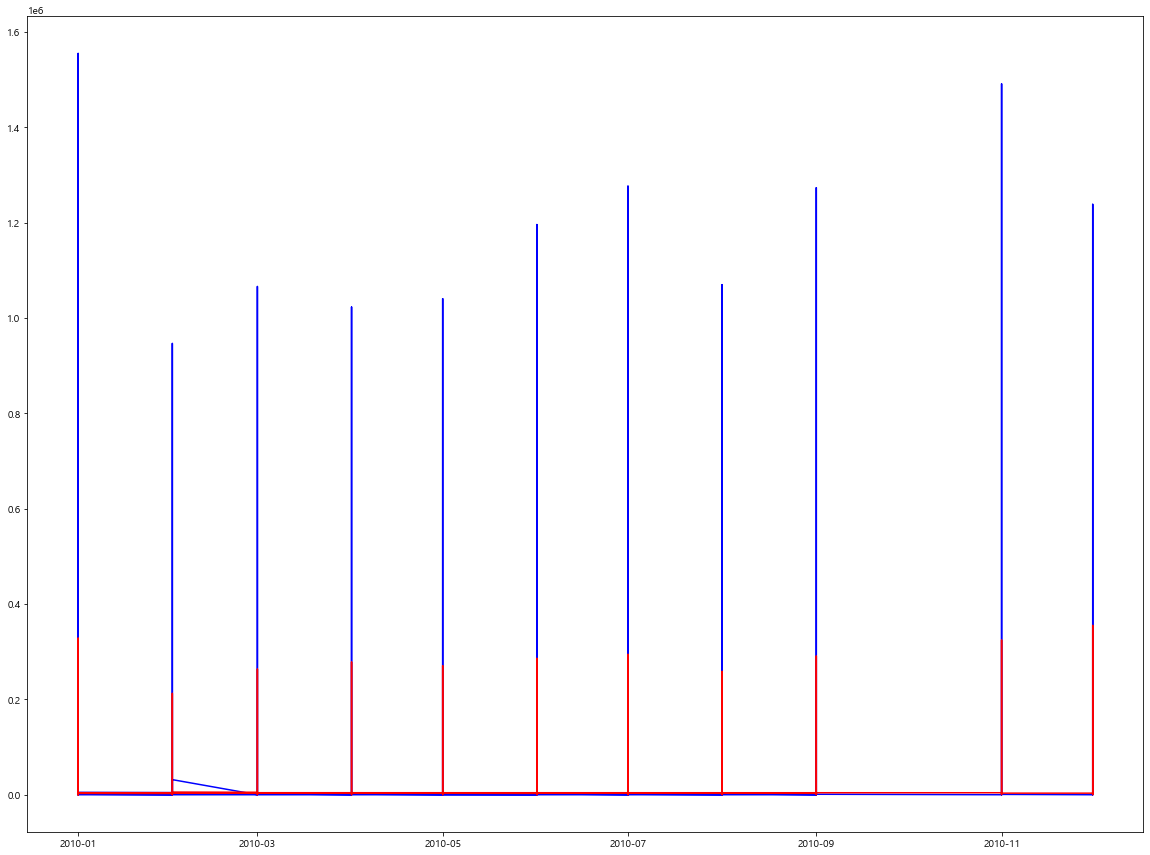

In [239]:
fig = plt.figure(figsize=(20,15))
chart = fig.add_subplot(1, 1, 1)
chart.plot(df['2010'][['수출금액']], color='blue', label='수출금액')
chart.plot(df['2010'][['수출금액']].rolling(window=12).mean(), color='red', label='수출금액')

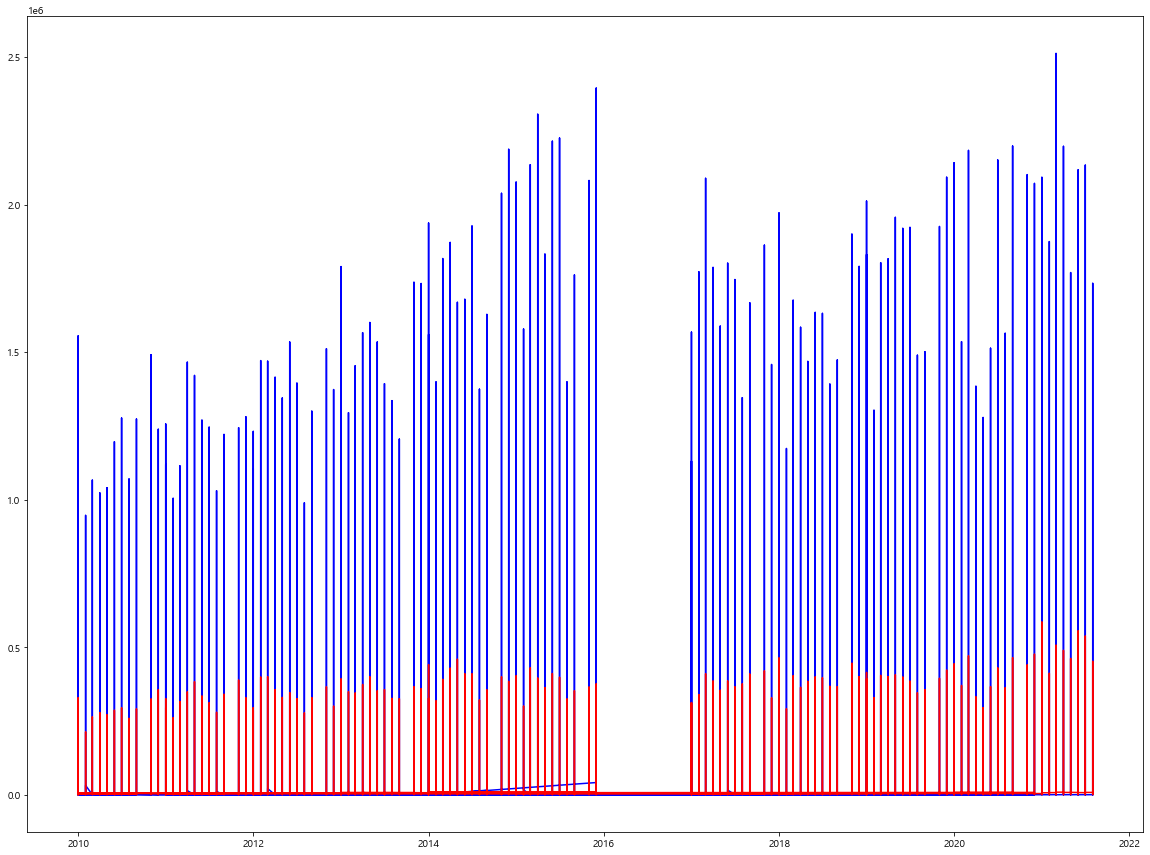

In [242]:
fig = plt.figure(figsize=(20,15))
chart = fig.add_subplot(1, 1, 1)
chart.plot(df[['수출금액']], color='blue', label='수출금액')
chart.plot(df[['수출금액']].rolling(window=12).mean(), color='red', label='수출금액')

In [243]:
df['2017']

,품목명,품목코드,국가명,수출중량,수입중량,수출금액,수입금액,무역수지
기간,,,,,,,,
2017-01-01,살아 있는 동물,1,러시아 연방,0.0,0.1,0,2,-2
2017-01-01,살아 있는 동물,1,미국,5.2,64.4,67,6449,-6382
2017-01-01,육과 식용 설육(屑肉),2,미국,0.0,35254.7,0,172701,-172701
2017-01-01,어류ㆍ갑각류ㆍ연체동물과 그 밖의 수생(水生) 무척추동물,3,미국,1097.0,12635.2,8570,27898,-19328
2017-01-01,어류ㆍ갑각류ㆍ연체동물과 그 밖의 수생(水生) 무척추동물,3,러시아 연방,463.4,18775.9,734,64232,-63498
...,...,...,...,...,...,...,...,...
2017-12-01,완구ㆍ게임용구ㆍ운동용구와 이들의 부분품과 부속품,95,미국,286.0,719.5,11125,9780,1345
2017-12-01,잡품,96,러시아 연방,69.0,0.0,1151,0,1151
2017-12-01,잡품,96,미국,340.2,88.8,6931,4284,2647


In [219]:
import matplotlib.pyplot as plt

In [220]:
df.set_index('기간', inplace=True)

<AxesSubplot:xlabel='기간'>

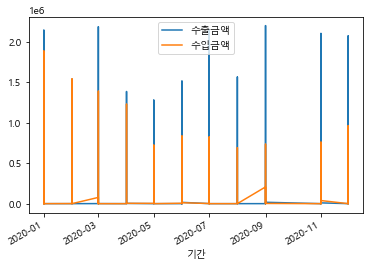

In [234]:
df['2020'][['수출금액', '수입금액']].plot()

In [ ]:
df['기간_변환']=pd.to_datetime(df['기간'], format='%Y%m')

In [159]:
# dates

0        2020.01
1        2020.01
2        2020.01
3        2020.01
4        2020.01
          ...   
23209    2021.08
23210    2021.08
23211    2021.08
23212    2021.08
23213    2021.08
Name: 기간, Length: 23214, dtype: object

In [136]:
foreign_list = ['페루', '미국', '중국', '필리핀', '미얀마', '인디아', '호주', '베트남', '이스라엘', '뉴질랜드', '칠레', '수입산', '태국', '에쿠아도르']
len(foreign_list)

14

In [135]:
country_df[country_df['국가명'].isin(foreign_list)]
item_cate =['포도', '양파', '당근', '대파']


,국가코드,국가명
13,AU,호주
46,CL,칠레
48,CN,중국
64,EC,에쿠아도르
105,IL,이스라엘
107,IN,인디아
150,MM,미얀마
177,NZ,뉴질랜드
180,PE,페루
183,PH,필리핀


In [241]:
items_df[items_df['품목명'].isin(item_cate)]

,품목코드,품목명
952,703101000,양파
976,706101000,당근
1025,710801000,양파
1028,710804000,당근
1045,711904000,당근
1054,712200000,양파
1076,712902040,당근
2216,2001909070,양파
2317,2008991000,포도
